In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from os.path import join
from sklearn.neighbors import (KNeighborsRegressor,
                               KNeighborsClassifier)
from sklearn.metrics import (r2_score,
                             mean_squared_error,
                             mean_absolute_error,
                             accuracy_score)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler,
                                   OneHotEncoder,
                                   LabelEncoder)

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from PIL import Image

Estimator:

* fit
* predict
* predict_proba (классификаторов)

Transformer:

* fit
* transform
* fit_transform

## Regression

In [4]:
DATA_PATH = "data"
SEED = 111
np.random.seed(SEED)

In [5]:
data = pd.read_csv(join(DATA_PATH, "weather.csv"))
data.head()

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,Cold
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,Warm
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,Normal
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,Cold
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,Cold


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature_c         10000 non-null  float64
 1   Humidity              10000 non-null  float64
 2   Wind_Speed_kmh        10000 non-null  float64
 3   Wind_Bearing_degrees  10000 non-null  int64  
 4   Visibility_km         10000 non-null  float64
 5   Pressure_millibars    10000 non-null  float64
 6   Rain                  10000 non-null  int64  
 7   Description           10000 non-null  object 
dtypes: float64(5), int64(2), object(1)
memory usage: 625.1+ KB


In [7]:
X = data[["Wind_Speed_kmh", "Wind_Bearing_degrees"]]

In [8]:
X.std()

Wind_Speed_kmh            6.972569
Wind_Bearing_degrees    107.469909
dtype: float64

## StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
scaler.fit(X)

In [21]:
scaler.mean_, scaler.scale_

(array([ 10.813565, 185.9797  ]), array([  6.97221993, 107.46453502]))

In [26]:
X_scaled = scaler.transform(X)

In [27]:
scaler.transform(X)

array([[ 0.0654648 , -0.52091325],
       [ 1.45096327,  1.34016585],
       [-0.69425019,  0.06532667],
       ...,
       [ 0.0331365 ,  0.77253673],
       [-0.37789471,  0.4189317 ],
       [ 0.49266016, -0.51160785]])

## OneHotEncoder

In [29]:
X = data[["Description"]]

In [36]:
ohe = OneHotEncoder(sparse=False, drop="first")

In [37]:
ohe.fit(X)

OneHotEncoder(drop='first', sparse=False)

In [38]:
ohe.transform(X)

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [40]:
ohe.categories_

[array(['Cold', 'Normal', 'Warm'], dtype=object)]

In [ ]:
# w0 = w_cold + w_norm + w_warm

In [46]:
d = {"n_rooms": [1, 2, 3.2]}
X = pd.DataFrame(d)

In [47]:
ohe.fit(X)

OneHotEncoder(drop='first', sparse=False)

In [48]:
ohe.categories_

[array([1. , 2. , 3.2])]

## LabelEncoder

In [57]:
sex = np.array(["male", "female", "Nan", "tra", "male", "a"])
le = LabelEncoder()

In [58]:
le.fit_transform(sex)

array([3, 2, 0, 4, 3, 1])

## Work with data

In [59]:
data.columns

Index(['Temperature_c', 'Humidity', 'Wind_Speed_kmh', 'Wind_Bearing_degrees',
       'Visibility_km', 'Pressure_millibars', 'Rain', 'Description'],
      dtype='object')

In [60]:
data.head()

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,Cold
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,Warm
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,Normal
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,Cold
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,Cold


In [61]:
cat_cols = ["Rain", "Description"]

num_cols = ['Humidity', 'Wind_Speed_kmh', 'Wind_Bearing_degrees',
            'Visibility_km', 'Pressure_millibars']

all_features = cat_cols + num_cols

target = data["Temperature_c"].values

In [62]:
X = data[all_features]
y = target

In [64]:
preprocessor = ColumnTransformer(transformers=[
    ("scaler", StandardScaler(), num_cols),
    ("ohe", OneHotEncoder(drop="first"), cat_cols)
])

In [71]:
preprocessor.transformers

[('scaler',
  StandardScaler(),
  ['Humidity',
   'Wind_Speed_kmh',
   'Wind_Bearing_degrees',
   'Visibility_km',
   'Pressure_millibars']),
 ('ohe', OneHotEncoder(drop='first'), ['Rain', 'Description'])]

In [73]:
knn_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("knn", KNeighborsRegressor(n_neighbors=8, n_jobs=16))
])

In [78]:
knn_pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['Humidity', 'Wind_Speed_kmh',
                                                   'Wind_Bearing_degrees',
                                                   'Visibility_km',
                                                   'Pressure_millibars']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  ['Rain', 'Description'])])),
                ('knn', KNeighborsRegressor(n_jobs=16, n_neighbors=8))])

In [79]:
y_pred = knn_pipeline.predict(X)

In [80]:
y_pred

array([-1.31527778, 20.86666667, 11.6       , ..., 11.49791667,
        8.30555556,  9.30208333])

In [83]:
y

array([-0.55555556, 21.11111111, 16.6       , ...,  5.97777778,
        9.78888889, 11.13888889])

In [84]:
r2_score(y, y_pred)

0.8910390643975683

In [86]:
mean_squared_error(y, y_pred)

9.858102159067665

In [87]:
mean_absolute_error(y, y_pred)

2.387486527788737

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=SEED, 
                                                    test_size=0.1)

In [94]:
n_neighbors = [1, 3, 5, 8, 10, 15, 20, 25, 30]
for k in n_neighbors:
    knn_pipeline = Pipeline(steps=[
                                ("preprocessor", preprocessor),
                                ("knn_reg", KNeighborsRegressor(n_neighbors=k, n_jobs=16))
                            ])
    knn_pipeline.fit(X_train, y_train)
    y_pred = knn_pipeline.predict(X_test)
    print(f"With k = {k} R2 = {r2_score(y_test, y_pred)}")
    print(f"With k = {k} MSE = {mean_squared_error(y_test, y_pred)}")
    print()

With k = 1 R2 = 0.8010813394936397
With k = 1 MSE = 18.396087500630045

With k = 3 R2 = 0.8600467449347649
With k = 3 MSE = 12.942940192862094

With k = 5 R2 = 0.8713050510073599
With k = 5 MSE = 11.901766966111394

With k = 8 R2 = 0.8754103746341844
With k = 8 MSE = 11.52210478426671

With k = 10 R2 = 0.874446464082055
With k = 10 MSE = 11.611247667164756

With k = 15 R2 = 0.8763962284438256
With k = 15 MSE = 11.430932579010445

With k = 20 R2 = 0.8762678546518934
With k = 20 MSE = 11.44280464522665

With k = 25 R2 = 0.8754293669990381
With k = 25 MSE = 11.520348361793316

With k = 30 R2 = 0.8742488657728221
With k = 30 MSE = 11.629521647983704



Best k: 15

## Classification

#### Pikachu vs not Pikachu

In [95]:
PIKA_FOLDER = "data/pikachu_dataset"

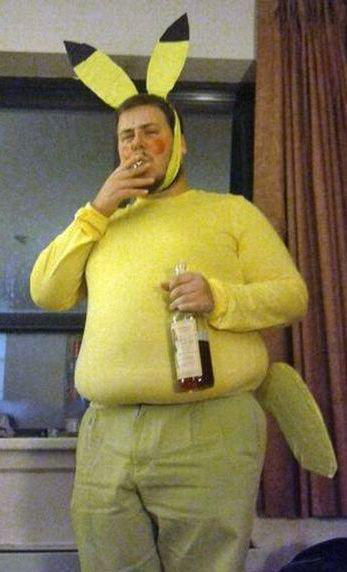

In [96]:
img = Image.open(join(PIKA_FOLDER, "train", "not_pikachu", "not_pikachu_00038.jpg"))
img

In [98]:
labels = ["pikachu", "not_pikachu"]
modes = ["train", "validation", "test"]
pika_mats = {}
img_size = 256
num_features = 3 * img_size * img_size

for label in labels:
    n_samples = len(os.listdir(join(PIKA_FOLDER, modes[0], label))) + \
                len(os.listdir(join(PIKA_FOLDER, modes[1], label))) + \
                len(os.listdir(join(PIKA_FOLDER, modes[2], label)))
    
    X = np.zeros((n_samples, num_features))
    i = 0
    for mode in modes:
        for img in os.listdir(join(PIKA_FOLDER, mode, label)):
            image = Image.open(join(PIKA_FOLDER, mode, label, img)).resize((img_size, img_size))
            image = np.array(image).reshape(num_features) # vector
            X[i] += image
            i += 1
            
    pika_mats[label] = X

In [99]:
pika_mats["pikachu"].shape

(645, 196608)

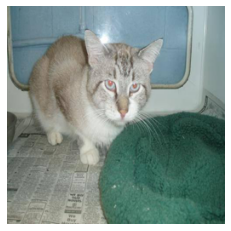

In [100]:
plt.imshow(pika_mats["not_pikachu"][120].astype(int).reshape((256, 256, 3)))
plt.axis("off");

In [101]:
X_merged = np.vstack([pika_mats["pikachu"], pika_mats["not_pikachu"]])
y = np.array([*np.repeat("pikachu", len(pika_mats["pikachu"]))] + \
             [*np.repeat("not_pikachu", len(pika_mats["not_pikachu"]))])
y_numeric = (y == "pikachu").astype(int)

pika_X_train, pika_X_test, pika_y_train, pika_y_test = train_test_split(X_merged,
                                                                        y_numeric,
                                                                        test_size=0.2248,
                                                                        random_state=SEED)

In [102]:
n_neighbors = [1, 3, 5, 8, 10, 15, 20, 25, 30]
for k in n_neighbors:
    knn_pipeline = lin_reg_pipeline = Pipeline(steps=[
                                            ("scaler", StandardScaler()),
                                            ("knn_reg", KNeighborsClassifier(n_neighbors=k, n_jobs=16))
                                        ])
    knn_pipeline.fit(pika_X_train, pika_y_train)
    y_pred = knn_pipeline.predict(pika_X_test)
    print(f"With k = {k} Accuracy = {accuracy_score(pika_y_test, y_pred)}")
    print()

With k = 1 Accuracy = 0.7448275862068966

With k = 3 Accuracy = 0.7655172413793103

With k = 5 Accuracy = 0.7724137931034483

With k = 8 Accuracy = 0.7379310344827587

With k = 10 Accuracy = 0.7344827586206897

With k = 15 Accuracy = 0.7724137931034483

With k = 20 Accuracy = 0.7758620689655172

With k = 25 Accuracy = 0.7896551724137931

With k = 30 Accuracy = 0.7862068965517242



In [106]:
knn_pipeline.predict_proba(X_merged[0:10])[:, 1] > 0.5

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True])

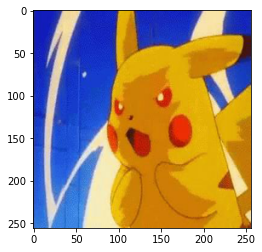

In [107]:
plt.imshow(X_merged[0].astype(int).reshape((256, 256, 3)));